# Imports 

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Data

In [12]:
train_labels = pd.read_csv('../data/train.csv')

# EDA

In [13]:
train_labels.describe()

,label
count,18618.000000
mean,0.554839
std,0.496997
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [16]:
id, lab = train_labels.iloc[3]

In [35]:
class train_data():
    def __init__(self, train_labels: pd.DataFrame = train_labels):
        self.train_labels = train_labels
        self.index = train_labels.index
    def __len__(self):
        return len(self.index)
    
    def __getitem__(self, index):
        try :
            name, label = self.train_labels.iloc[index]
        except IndexError:
            raise IndexError('Index out of range')
        path = f'../data/train/{name}'
        
        # read the jpg image
        image = plt.imread(path)
        return image, label
    

In [36]:
train = train_data(train_labels)

In [55]:
def plot_random_images(train: train_data, n: int = 6):
    "plots 0 and 1 labels in 2 different rows"
    fig, axs = plt.subplots(2, n, figsize=(20, 5))
    plt.subplots_adjust(wspace=0.1, hspace=0.3)
    i_0, i_1 = 0, 0
    while True :
        image, label = train[np.random.randint(len(train))]
        if label == 0 and i_0 < n:
            axs[0, i_0].imshow(image)
            axs[0, i_0].set_title(label)
            i_0 += 1
        elif label == 1 and i_1 < n:
            axs[1, i_1].imshow(image)
            axs[1, i_1].set_title(label)
            i_1 += 1
        if i_0 == n and i_1 == n:
            break

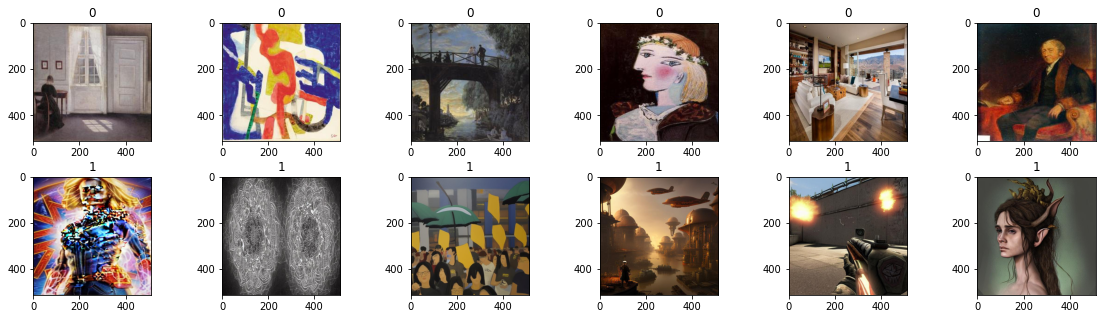

In [56]:
plot_random_images(train)